# Unwrapping the genomes
This notebook is an attempt to answering some of the questions of bio-informatics in regards to the recent panademic outbreak of Corona virus, from a non-medical background person's perspective. Every analysis presented here is based on the stuff I learnt and understood (or felt that I actually understood) about the genomes from the internet.

## Table of Contents:
- [Some Context](#Some-Context)
- [Comparison of composition of genomes](#Comparison-of-composition-of-genomes)
    - [Oligonucleotide composition](#Oligonucleotide-composition)
    - [GC Content](#GC-Content)
- [Proteins & Amino Acids](#Proteins-Amino-Acids)
    - [Protein Strands by genome](#Protein-Strands-by-genome)
    - [Amino Acids Distribution](#Amino-Acids-Distribution)
    - [Finding the ORFs](#Finding-the-ORFs)
    - [Summary of Protein Sequences](#summary-of-protein-seq)
- [Sequence Alignment](#Sequence-Alignement)
- [Pairwise Sequence Alignment](#Pairwise-Sequence-Alignment)
- [Genome Sequence Similarity](#Genome-Sequence-Similarity)
- [Generating a Phylogenetic Tree](#Generating-Phylogenetic-Tree)
- [Clustering all COVID-19 patients' genomes](#Clustering-patients-genomes)
- [Conclusions](#Conclusions)

<a id="Some-Context"></a>
# Some Context
**[Ques.] What is Genome?**<br>
[Genomes](https://en.wikipedia.org/wiki/Genome) are considered to be genetic material of any organism. It consists of [DNA](https://en.wikipedia.org/wiki/DNA)(or [RNA](https://en.wikipedia.org/wiki/RNA)) which in turn can be considered as the blueprints of any organisms' origin.
<img src="https://www.genome.gov/sites/default/files/tg/en/illustration/acgt.jpg" width=550 height=400>

**[Ques.] How to study Genomes?**<br>
A genome consists of a sequence of [nucleotides](https://en.wikipedia.org/wiki/Nucleotide) that together make up all the [chromosomes](https://en.wikipedia.org/wiki/Chromosome) of any organism. These nucleotides are the basic building blocks of DNA and RNA. A DNA genome has 4 types of base nucleotides -<br> `Adenine` also represented as `A`,<br>`Thymine` represented as `T`,<br>`Guanine` represented as `G` and<br>`Cytosine` represented as `C`.<br> In RNA genome, the `Thymine` nucleotide is replaced with what is known as `Uracil` represented as `U`.<br> In short, any genome sequence is basically a combination of all these nucleotide in smoe order.
<img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Difference_DNA_RNA-EN.svg" width=550 height=600>

**[Ques.] Can one find a cure for [COVID-19](https://en.wikipedia.org/wiki/Coronavirus_disease_2019) by just studying the genomes?**<br>
**Not sure**, as the [molecular biology](https://en.wikipedia.org/wiki/Molecular_biology) has not really been my field of study (*never liked Biology tbh*) but also because its a very vast subject where to confirm on a single hypothesis also takes months/years of evaluation and testing. Having said that, the whole purpose of this analysis is to help the ones who actually understand molecular biology get some data-driven insights to be able to preapare a RNA vaccine at the earliest.
<img src="https://images.theconversation.com/files/324780/original/file-20200402-23151-18gxxtu.png" width=500 height=500>

## Loading libraries & genomes

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import re
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
os.environ['QT_QPA_PLATFORM']='offscreen' # https://github.com/etetoolkit/ete/issues/296

import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Back, Style, Fore

try:
    from Bio.Align.Applications import ClustalwCommandline
    from Bio import Align, pairwise2
except:
    !pip install biopython
    from Bio.Align.Applications import ClustalwCommandline
    from Bio import Align, pairwise2
try:
    from ete3 import Tree, TreeStyle
except:
    !pip install ete3
    from ete3 import Tree, TreeStyle

     |████████████████████████████████| 10.5 MB 2.7 MB/s 
  Created wheel for ete3: filename=ete3-3.1.1-py3-none-any.whl size=2226265 sha256=5fe0b84d34e8826c5af7c0c1fa0f4f200c97cfc8148ec16aabc9618f8a3c86bc
  Stored in directory: /root/.cache/pip/wheels/5b/58/97/080223dafb12fcab00a43094bed5d3103ada0066a673af1994
Successfully built ete3


In [2]:
# covid-19 genome
with open("/kaggle/input/coronavirus-accession-sars-mers-cov2/sars.fasta", "r") as file:
    sars_genome = file.read().split("genome")[1].replace("\n", "")
# mers genome
with open ("/kaggle/input/coronavirus-accession-sars-mers-cov2/mers.fasta", "r") as file:
    mers_genome = file.read().split("genome")[1].replace("\n", "")
# sars genome
with open ("/kaggle/input/coronavirus-accession-sars-mers-cov2/cov2.fasta", "r") as file:
    cov_genome = file.read().split("genome")[1].replace("\n", "")
# civet with sars like cov genome
with open("/kaggle/input/ebolav-vs-sarscov-vs-mers/Civet-SARS.fasta", "r") as file:
    civet_sl_cov_genome = file.read().split("complete genome")[-1].replace("\n","")
# bat with sars like cov genome
with open("/kaggle/input/ebolav-vs-sarscov-vs-mers/BAT-SARS.fasta", "r") as file:
    bat_sl_cov_genome = file.read().split("complete genome")[-1].replace("\n","")
# ebola-5 genome
with open("/kaggle/input/ebolav-vs-sarscov-vs-mers/EBOLAV.fasta", "r") as file:
    ebola5_genome = file.read().split("complete genome")[-1].replace("\n","")
# camel with cov genome
with open("/kaggle/input/cameluscovfasta/camelus.fasta", "r") as file:
    camel_cov_genome = file.read().split("complete genome")[-1].replace("\n", "")
# malaria genome
with open("/kaggle/input/cameluscovfasta/plasmodium-malariae.fasta", "r") as file:
    malaria_genome = file.read().split("complete sequence")[-1].replace("\n", "")
# hiv-2 genome
with open("/kaggle/input/cameluscovfasta/hiv2.fasta", "r") as file:
    hiv2_genome = file.read().split("complete genome")[-1].replace("\n", "")
# hedgehog with cov genome
with open("/kaggle/input/cameluscovfasta/hedgehog.fasta", "r") as file:
    hedgehog_cov_genome = file.read().split("complete genome")[-1].replace("\n", "")


lets have a look at a snippet of one of the genomes

In [3]:
hiv2_genome[:3000]

'TGCAAGGGATGTTTTACAGTAGGAGGAGACATAGAATCCTAGACATATACCTAGAAAAAGAGGAAGGGATAATACCAGATTGGCAGAATTATACTCATGGGCCAGGAGTAAGGTACCCAATGTACTTCGGGTGGCTGTGGAAGCTAGTATCAGTAGAACTCTCACAAGAGGCAGAGGAAGATGAGGCCAACTGCTTAGTACACCCAGCACAAACAAGCAGACATGATGATGAGCATGGGGAGACATTAGTGTGGCAGTTTGACTCCATGCTGGCCTATAACTACAAGGCCTTCACTCTGTACCCAGAAGAGTTTGGGCACAAGTCAGGATTGCCAGAGAAAGAATGGAAGGCAAAACTGAAAGCAAGAGGGATACCATATAGTGAATAACAGGAACAACCATACTTGGTCAAGGCAGGAAGTAGCTACTAAGAAACAGCTGAGGCTGCAGGGACTTTCCAGAAGGGGCTGTAACCAAGGGAGGGACATGGGAGGAGCTGGTGGGGAACGCCCTCATACTTACTGTATAAATGTACCCGCTTCTTGCATTGTATTCAGTCGCTCTGCGGAGAGGCTGGCAGATCGAGCCCTGAGAGGTTCTCTCCAGCACTAGCAGGTAGAGCCTGGGTGTTCCCTGCTGGACTCTCACCAGTACTTGGCCGGTACTGGGCAGACGGCTCCACGCTTGCTTGCTTAAAGACCTCTTCAATAAAGCTGCCAGTTAGAAGCAAGTTAAGTGTGTGTTCCCATCTCTCCTAGTCGCCGCCTGGTCATTCGGTGTTCATCTGAGTAACAAGACCCTGGTCTGTTAGGACCCTTCTCGCTTTGGGAATCCAAGGCAGGAAAATCCCTAGCAGGTTGGCGCCCGAACAGGGACTTGAAGAGGACTGAGAAGCCCTGGAACTCGGCTGAGTGAAGGCAGTAAGGGCGGCAGGAACAAACCACGACGGAGTGCTCCTAGAAAGGCGCGGGCCGAGGTACCAAAGGCGGCGTGTGGAGC

having a huge sequence and with everyting in single color could be difficult to read. So let's color-code these nucleotides in the sequences and have them represented as they are normally written.

In [4]:
# some helper functions for representation of sequences

# usually DNA sequences are written in 10-nucleotide fashion
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

# color code to represent genome sequences
nu_clr_switcher = {
    # standard color-codes
    'A': Back.GREEN,
    'C': Back.YELLOW,
    'G': Back.RED,
    'T': Back.BLUE,
    ' ': Style.RESET_ALL
}
protein_clr_switcher = {
    # color-code by proteinfamily's polarity
    'A': Back.BLUE,
    'V': Back.BLUE,
    'I': Back.BLUE,
    'L': Back.BLUE,
    'M': Back.BLUE,
    'F': Back.BLUE,
    'Y': Back.CYAN,
    'W': Back.BLUE,
    'H': Back.CYAN,
    'R': Back.RED,
    'K': Back.RED,
    'N': Back.GREEN,
    'Q': Back.GREEN,
    'E': Back.MAGENTA,
    'D': Back.MAGENTA,
    'S': Back.GREEN,
    'T': Back.GREEN,
    'G': Back.YELLOW,
    'P': Back.YELLOW,
    'C': Back.BLUE,
    ' ': Style.RESET_ALL
}
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL
        
    if strand == 'protein':
        for i in range(len(genome_str)):
            if genome_str[i] in protein_clr_switcher:
                if genome_str[i] == 'S' and genome_str[i+1:i+4] == 'TOP':
                    text = Style.RESET_ALL + 'S'
                elif genome_str[i] == 'T' and genome_str[i-1] == 'S' and genome_str[i+1:i+3] == 'OP':
                    text = Style.RESET_ALL + 'T'
                elif genome_str[i] == 'P' and genome_str[i-3:i] == 'STO':
                    text = Style.RESET_ALL + 'P'
                else:
                    text = protein_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                Style.RESET_ALL
                text = genome_str[i]
            print(text, end="")

In [5]:
print("COVID-19 genome: ")
seq_repr(cov_genome)

COVID-19 genome: 
ATTAAAGGTT TATACCTTCC CAGGTAACAA ACCAACCAAC TTTCGATCTC TTGTAGATCT
GTTCTCTAAA CGAACTTTAA AATCTGTGTG GCTGTCACTC GGCTGCATGC TTAGTGCACT
CACGCAGTAT AATTAATAAC TAATTACTGT CGTTGACAGG ACACGAGTAA CTCGTCTATC
TTCTGCAGGC TGCTTACGGT TTCGTCCGTG TTGCAGCCGA TCATCAGCAC ATCTAGGTTT
CGTCCGGGTG TGACCGAAAG GTAAGATGGA GAGCCTTGTC CCTGGTTTCA ACGAGAAAAC
ACACGTCCAA CTCAGTTTGC CTGTTTTACA GGTTCGCGAC GTGCTCGTAC GTGGCTTTGG
AGACTCCGTG GAGGAGGTCT TATCAGAGGC ACGTCAACAT CTTAAAGATG GCACTTGTGG
CTTAGTAGAA GTTGAAAAAG GCGTTTTGCC TCAACTTGAA CAGCCCTATG TGTTCATCAA
ACGTTCGGAT GCTCGAACTG CACCTCATGG TCATGTTATG GTTGAGCTGG TAGCAGAACT
CGAAGGCATT CAGTACGGTC GTAGTGGTGA GACACTTGGT GTCCTTGTCC CTCATGTGGG
CGAAATACCA GTGGCTTACC GCAAGGTTCT TCTTCGTAAG AACGGTAATA AAGGAGCTGG
TGGCCATAGT TACGGCGCCG ATCTAAAGTC ATTTGACTTA GGCGACGAGC TTGGCACTGA
TCCTTATGAA GATTTTCAAG AAAACTGGAA CACTAAACAT AGCAGTGGTG TTACCCGTGA
ACTCATGCGT GAGCTTAACG GAGGGGCATA CACTCGCTAT GTCGATAACA ACTTCTGTGG
CCCTGATGGC TACCCTCTTG AGTGCATTAA AGACCTTCTA GCACGTGCTG GTA

<a id="Comparison-of-composition-of-genomes"></a>
# Comparison of composition of genomes
Comparing the genomic composition, helps Vaccinologist do [reverse vaccinology](https://en.wikipedia.org/wiki/Reverse_vaccinology) to discover candidate [antigents](https://en.wikipedia.org/wiki/Antigen) for vaccine development by analyzing the genome of a pathogen or a family of pathogens.

For the comparison of composition of these genomes, I'll be looking at the<br>
- Oligonucleotide composition<br>
- GC content

<a id="Oligonucleotide-composition"></a>
### 1. Oligonucleotide composition:
[Oligonucleotides](https://en.wikipedia.org/wiki/Oligonucleotide) are DNA or RNA molecules made up of a sequence of nucleotides. The length of the oligonucleotide is represented as "[k-mer](https://en.wikipedia.org/wiki/K-mer)" ($k$ being the number of nucleotides in one oligonulceotide). In this analysis, I'll be looking at the **3-mers** (or **trinucleotides**) and **4-mer** (or **tetranucleotides**) compositions against their normalized frquency of occurrences.

In [6]:
# tri-nucleotide compositions
trimers = ["AAA", "AAC", "AAG", "AAT", "ACA", "ACC", "ACG", "ACT", "AGA", "AGC", "AGG", "ATA", "ATC", "ATG", "CAA", 
           "CAC", "CAG", "CCA","CCC","CCG","CGA","CGC","CTA","CTC","GAA","GAC","GCA","GCC","GGA","GTA","TAA","TCA"]

def trimer_composition(genome):
    trimer_dict = dict()
    for trimer in trimers:
        trimer_dict[trimer] = genome.count(trimer)
    return trimer_dict

# tetra-nucleotide compositions
tetramers = ['AAAA','AAAC','AAAG','AAAT','AACA','AACC','AACG','AACT','AAGA','AAGC','AAGG','AAGT','AATA','AATC',
             'AATG','AATT','ACAA','ACAC','ACAG','ACAT','ACCA','ACCC','ACCG','ACCT','ACGA','ACGC','ACGG','ACGT',
             'ACTA','ACTC','ACTG','AGAA','AGAC','AGAG','AGAT','AGCA','AGCC','AGCG','AGCT','AGGA','AGGC','AGGG',
             'AGTA','AGTC','AGTG','ATAA','ATAC','ATAG','ATAT','ATCA','ATCC','ATCG','ATGA','ATGC','ATGG','ATTA',
             'ATTC','ATTG','CAAA','CAAC','CAAG','CACA','CACC','CACG','CAGA','CAGC','CAGG','CATA','CATC','CATG',
             'CCAA','CCAC','CCAG','CCCA','CCCC','CCCG','CCGA','CCGC','CCGG','CCTA','CCTC','CGAA','CGAC','CGAG',
             'CGCA','CGCC','CGCG','CGGA','CGGC','CGTA','CGTC','CTAA','CTAC','CTAG','CTCA','CTCC','CTGA','CTGC',
             'CTTA','CTTC','GAAA','GAAC','GACA','GACC','GAGA','GAGC','GATA','GATC','GCAA','GCAC','GCCA','GCCC',
             'GCGA','GCGC','GCTA','GGAA','GGAC','GGCA','GGCC','GGGA','GGTA','GTAA','GTAC','GTCA','GTGA','GTTA',
             'TAAA','TACA','TAGA','TATA','TCAA','TCCA','TCGA','TGAA','TGCA','TTAA']

def tetramer_composition(genome):
    tetramer_dict = dict()
    for tetramer in tetramers:
        if tetramer in genome:
            tetramer_dict[tetramer] = genome.count(tetramer)
        else:
            tetramer_dict[tetramer] = 0
    return tetramer_dict

In [7]:
labels = ["SARS", "MERS", "COVID-19", "Civet_SL_CoV","Bat_SL_CoV","Ebola","Camel_CoV","Malaria","HIV","Hedgehog_CoV"]

traces = []
for i, genome in enumerate((sars_genome,mers_genome,cov_genome,civet_sl_cov_genome,bat_sl_cov_genome,ebola5_genome,
                            camel_cov_genome,malaria_genome,hiv2_genome,hedgehog_cov_genome)):
    composition = trimer_composition(genome)
    total_composition = sum(composition.values())
    norm_freq = [count/total_composition for count in composition.values()]
    traces.append(go.Scatter(x=trimers,y=norm_freq,mode='lines',name=labels[i]))
    
layout=go.Layout(
    title="Trinucleotide Composition of genomes",
    xaxis_title="Trinucleotides",
    yaxis_title="Normalized frequencies",
    width=800, height=600
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename="3mer-composition-frequency")


Now lets have a look at the tetramer composition of these genomes

In [8]:
labels = ["SARS", "MERS", "COVID-19", "Civet_SL_CoV","Bat_SL_CoV","Ebola","Camel_CoV","Malaria","HIV","Hedgehog_CoV"]

traces = []
for i, genome in enumerate((sars_genome,mers_genome,cov_genome,civet_sl_cov_genome,bat_sl_cov_genome,ebola5_genome,
                            camel_cov_genome,malaria_genome,hiv2_genome,hedgehog_cov_genome)):
    composition = tetramer_composition(genome)
    total_composition = sum(composition.values())
    norm_freq = [count/total_composition for count in composition.values()]
    traces.append(go.Scatter(x=tetramers,y=norm_freq,mode='lines',name=labels[i]))
    
layout=go.Layout(
    title="Tetranucleotides Composition of genomes",
    xaxis_title="Tetranucleotides",
    yaxis_title="Normalized frequencies",
    width=1000, height=600
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename="4mer-composition-frequency")

Well that's alot to put in one plot, but the good thing with **plotly** is that you can always turn off a few legends to compare the values just among the selected few.

For a moment, lets just look at the tetranucleotide composition of all the "corona-virus infected species".

In [9]:
labels = ["SARS", "MERS", "COVID-19", "Civet_SL_CoV","Bat_SL_CoV","Camel_CoV","Hedgehog_CoV"]

traces = []
for i, genome in enumerate((sars_genome,mers_genome,cov_genome,civet_sl_cov_genome,
                            bat_sl_cov_genome,camel_cov_genome,hedgehog_cov_genome)):
    composition = tetramer_composition(genome)
    total_composition = sum(composition.values())
    norm_freq = [count/total_composition for count in composition.values()]
    traces.append(go.Scatter(x=tetramers,y=norm_freq,mode='lines',name=labels[i]))
    
layout=go.Layout(
    title="Tetranucleotides Composition of genomes",
    xaxis_title="Tetranucleotides",
    yaxis_title="Normalized frequencies",
    width=1000, height=600
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename="4mer-composition-frequency")

<a id="GC-Content"></a>
### 2. GC Content:
**[GC content](https://en.wikipedia.org/wiki/GC-content)** (or **Guanine-Cytosine content**) is the percentage of nucleotides bases in a DNA/RNA molecule that are either guanine (G) or cytosine (C). GC content is always expressed as a percentage value and is supposed to remaine the same among genomes of same specie.

$$\frac{G + C}{A + C + G + T} \times 100\ \%$$

In [10]:
def gc_content(genome):
    g_content = genome.count("G")
    c_content = genome.count("C")
    a_content = genome.count("A")
    t_content = genome.count("T")
    return 100*((g_content+c_content)/(a_content+c_content+g_content+t_content))

gc_content_perc = [gc_content(sars_genome),gc_content(mers_genome),gc_content(cov_genome),gc_content(civet_sl_cov_genome),
                   gc_content(bat_sl_cov_genome),gc_content(ebola5_genome),gc_content(camel_cov_genome),
                   gc_content(malaria_genome),gc_content(hiv2_genome), gc_content(hedgehog_cov_genome)]
viruses = ["SARS", "MERS", "COVID-19", "Civet_SL_CoV","Bat_SL_CoV","Ebola","Camel_CoV","Malaria","HIV","Hedgehog_CoV"]
colors = ["lightslategray",] * 10
colors[2] = "crimson"

fig = go.Figure(data=[go.Bar(
    x=viruses,
    y=gc_content_perc,
    text=gc_content_perc,
    marker_color=colors
)])
fig.update_traces(texttemplate="%{text:.2f}%", textposition="outside")
fig.update_layout(
    title_text="GC content distribution among genomes",
    xaxis_title="Genomes",
    yaxis_title="GC content (%)"
)

<a id="Proteins-Amino-Acids"></a>
# Proteins & Amino Acids
The most commonly occuring amino acids are abbreviated by using 20 letters from the english alphabet (all letters except for B,J,O,U,X and Z). The protein strings are constructed from these 20 alphabets as symbols. Henceforth, a Protein Sequence can also be incorporated using the nucleotide sequences.

<img src="https://1.bp.blogspot.com/-QpZ1VXFbJhE/V4d5EjT3FYI/AAAAAAAADvk/UGZK71q3KV4AwrOfR_bdEk2FnC93Cb-JwCLcB/s1600/codon.png" width=550 height=400>

The DNA codon table on [wiki](https://en.wikipedia.org/wiki/DNA_codon_table) dictates the details regarding the encoding of specific codons into amino acids alphabets.



In [11]:
def gen_protein_seq(genome_str):
    # codon table from wiki
    protein = {"TTT" : "F", "CTT" : "L", "ATT" : "I", "GTT" : "V",
           "TTC" : "F", "CTC" : "L", "ATC" : "I", "GTC" : "V",
           "TTA" : "L", "CTA" : "L", "ATA" : "I", "GTA" : "V",
           "TTG" : "L", "CTG" : "L", "ATG" : "M", "GTG" : "V",
           "TCT" : "S", "CCT" : "P", "ACT" : "T", "GCT" : "A",
           "TCC" : "S", "CCC" : "P", "ACC" : "T", "GCC" : "A",
           "TCA" : "S", "CCA" : "P", "ACA" : "T", "GCA" : "A",
           "TCG" : "S", "CCG" : "P", "ACG" : "T", "GCG" : "A",
           "TAT" : "Y", "CAT" : "H", "AAT" : "N", "GAT" : "D",
           "TAC" : "Y", "CAC" : "H", "AAC" : "N", "GAC" : "D",
           "TAA" : "STOP", "CAA" : "Q", "AAA" : "K", "GAA" : "E",
           "TAG" : "STOP", "CAG" : "Q", "AAG" : "K", "GAG" : "E",
           "TGT" : "C", "CGT" : "R", "AGT" : "S", "GGT" : "G",
           "TGC" : "C", "CGC" : "R", "AGC" : "S", "GGC" : "G",
           "TGA" : "STOP", "CGA" : "R", "AGA" : "R", "GGA" : "G",
           "TGG" : "W", "CGG" : "R", "AGG" : "R", "GGG" : "G" 
           }
    protein_seq = ""
    
    # generating the protein seq
    for i in range(0, len(genome_str)-(3+len(genome_str)%3), 3):
        protein_seq += protein[genome_str[i:i+3]]
    return protein_seq

lets have a look at the protein sequences of a few of these genome before we go for a comparative analysis

In [12]:
print("Protein Sequences in Malaria: ")
seq_repr(gen_protein_seq(malaria_genome), strand='protein')

Protein Sequences in Malaria: 
PTAQIFAIIAMRDGRVYLHPSNTPSTOPGCCRCRVFTLLRLPSGTFDESTTGWEKTSSLYHPGGNHTSTVSWWTILRKAAMGTGRLLLDEKEETPSTOPSCTHEVLGPTARCCSTOPYPIDEVNSTOPAFSTNRGCHQCCRRQFGVLGPHYVPSRREGKCKHLSTOPGLSPKDVLCWYFQSRPSGGSTOPLEELLPISVSPICSTOPNGGHRWEAYYQSTOPDQHLQETPWSLYLQEPGLIFQIIPDSWPPTLNTSISLYGEAMSTOPGEISSTOPEVSTOPGSCDFPSRSEGVTSQSTOPDGRGRLLHRSTOPKVPPLSCPTSTOPCRTFFHSTOPSTOPFGRLSTOPVLHLRRRECLRRSNINDSTOPGTREEVRYHGGDDPLGVYPTQYRPRNLEISLQGYPHSRRFLPSTOPTSYFRFSSTOPGTTWSHEGPSTOPRSHRSPTHVCCLEEKCPSTYGTLSTOPHSGSTOPNGQSTOPSPYRHCGSSMAADPAGTFGAHFKTHDVESPICVLQFSSAGSSLDGGHNDLQVQVVELRRSSILRFEGRDECSRYHLDSSPRETIPKGLWSTTKSLRSTOPLRNRSYWTSTOPRDRPPDGTTYSLAQRYHDGGTHGEAMSHSLEPLCGVLRVAQIQSSTOPVSTOPPGEPPSEALPYWGRSTOPSLSGRSPALSSTOPLYDKVPSSIWVPDRGWSTWYFPYSGTLRGESTVHREFLEEETPSTOPSQELSRIDDCGDHKGQNSSTOPTRISTSYYQRSTOPSTOPECCHRQVLDDISLFEVDAKTPTVARMAQTDDKRPIRVTNGGMATESPETSEVFQSTOPHHASQILRGLWLSHVRPRGIYGLYKSLPTIAVDYRRSLSTOPRPSTMEGRDQRTFPVKPEPLEERRHSTOPVSKVRTRHHSTOPTTHDGLESTOPSSELEATRREVSISSWSTRDSSRGPTGGLHVHKTICRSTOPGDTRCHFPKL

In [13]:
print("Protein sequences in CoV: ")
seq_repr(gen_protein_seq(cov_genome), strand='protein')

Protein sequences in CoV: 
IKGLYLPRSTOPQTNQLSISCRSVLSTOPTNFKICVAVTRLHASTOPCTHAVSTOPLITNYCRSTOPQDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTERSTOPDGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTSSTOPRWHLWLSRSSTOPKRRFASTSTOPTALCVHQTFGCSNCTSWSCYGSTOPAGSRTRRHSVRSSTOPWSTOPDTWCPCPSCGRNTSGLPQGSSSSTOPERSTOPSTOPRSWWPSTOPLRRRSKVISTOPLRRRAWHSTOPSLSTOPRFSRKLEHSTOPTSTOPQWCYPSTOPTHASTOPASTOPRRGIHSLCRSTOPQLLWPSTOPWLPSSTOPVHSTOPRPSSTCWSTOPSFMHFVRTTGLYSTOPHSTOPEGCILLPSTOPTSTOPASTOPNCLVHGTFSTOPKELSTOPIADTFSTOPNSTOPIGKEISTOPHLQWGMSKFCISLKFHNQDYSTKGSTOPKEKASTOPWLYGSTOPNSICLSSCVTKSTOPMQPNVPFNSHEVSTOPSLWSTOPNFMADGRFCSTOPSHLRILWHSTOPEFDSTOPRRCHYLWLLTPKCCCSTOPNLLSSMSQFRSRTSTOPASTOPSCRIPSTOPSTOPIWLENHSSSTOPGWSHYCLWRLCVLLCWLPSTOPQVCLLGSTCSTOPRSTOPHRLSTOPPYRCCWRRFRRSSTOPSTOPQPSSTOPNTPKRESQHQYCWSTOPLSTOPTSTOPSTOPRDRHYFGIFFCFHKCFCGNCERFGLSTOPSIQTNCSTOPILWSTOPFSTOPSYKRKSSTOPKRCLEYWSTOPTEINTESSLCICIRGCSCCTINFLPHSSTOPNCSKFCACFTEGRYNNTRWNFTVFTETHSTOPCYDVHISTOPFGYSTOPQSSCNGLHYRWCCSVDFAVANSTOPHLWHCLSTOPKTQTRPSTOPLASTOPREVSTOPGRCRVSSTO

<a id="Protein-Strands-by-genome"></a>
### 1. Protein Strands by genome

In [14]:
genomes = {"SARS": sars_genome,"MERS": mers_genome,"COVID-19": cov_genome,"Civet_SL_CoV": civet_sl_cov_genome,
           "Bat_SL_CoV": bat_sl_cov_genome,"Ebola": ebola5_genome,"Camel_CoV": camel_cov_genome,
           "Malaria": malaria_genome,"HIV": hiv2_genome,"Hedgehog_CoV": hedgehog_cov_genome}

colors = ["lightslategray",] * 10
colors[2] = "crimson"

# for virus_name, virus_gene in genomes.items():
#     print(virus_name, len(gen_protein_seq(virus_gene).split('STOP')))

fig = go.Figure(data=[go.Bar(
    x=list(genomes.keys()),
    y=[len(gen_protein_seq(genome).split('STOP')) for genome in genomes.values()],
    text=[len(gen_protein_seq(genome).split('STOP')) for genome in genomes.values()],
    marker_color=colors
)])

fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(
    title_text="Number of protein strands among genomes",
    xaxis_title="Genomes",
    yaxis_title="number of protein strands"
)

<a id="Amino-Acids-Distribution"></a>
### 2. Amino Acids Distribution

In [15]:
def amino_acid_composition(protein_seq):
    amino_acids_dict = {'Y': 0, 'A': 0, 'Q': 0, 'D': 0, 'C': 0, 'G': 0, 'V': 0, 'T': 0, 'E': 0, 'N': 0, 
                       'K': 0, 'R': 0, 'S': 0, 'I': 0, 'H': 0, 'M': 0, 'F': 0, 'L': 0, 'W': 0, 'P': 0}
    for amino_acid in amino_acids_dict:
        amino_acids_dict[amino_acid] = protein_seq.count(amino_acid)/len(protein_seq)*100
    return amino_acids_dict

In [16]:
fig = go.Figure()
for i in range(10):
    fig.add_trace(go.Bar(
        x=list(amino_acid_composition(gen_protein_seq(list(genomes.values())[i])).keys()),
        y=list(amino_acid_composition(gen_protein_seq(list(genomes.values())[i])).values()),
        name=list(genomes.keys())[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode="group",
                  title="Distribution of Amino Acids by genomes", 
                  xaxis_title="Amino Acids", 
                  yaxis_title="Normalized Frequency (%)")
fig.show()

<a id="Finding-the-ORFs"></a>
### 3. Finding the ORFs (Open Reading Frames)
The stretch of codons from start-codon (ATG) to stop-codon (TAA/TAG/TGA) is called [Open Reading Frame (ORF)](https://en.wikipedia.org/wiki/Open_reading_frame)


In [17]:
def get_orfs(protein_seq):
    orf_strands = []
    # generate ORFs
    for seq in protein_seq.split("STOP"):
        for nu in range(len(seq)-1, -1, -1):
            if seq[nu] == "M":
                orf_strands.append(seq[nu:]+"STOP")
    # search in original seq
    patterns = "|".join(orf_strands)
    res_seq = re.sub(patterns, lambda x: x.group(0).lower(), protein_seq)
    # highlight the ORFs in the seq
    for nu in res_seq:
        if nu.isupper():
            print(Style.RESET_ALL + nu, end="")
        else:
            print(Back.BLUE + nu.upper(), end="")
    print(Style.RESET_ALL+"\n")

the highlighted sequences represent the ORFs

In [18]:
for genome_name, genome in genomes.items():
    print("\nORFs in {}'s protein sequences:".format(genome_name))
    get_orfs(gen_protein_seq(genome))
    print()


ORFs in SARS's protein sequences:
ILGFYLPRKSQPTSISCRSVLSTOPTNFKICVAVARLHASTOPCTYAVSTOPTIINFTVVDKKRVTRPSSADCLRFRPCCSRSSAYLGFVRVSTOPPKGKMESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEMDGIQYGRSGITLGVLVPHVGETPIAYRNVLLRKNGNKGAGGHSYGIDLKSYDLGDELGTDPIEDYEQNWNTKHGSGALRELTRELNGGAVTRYVDNNFCGPDGYPLDCIKDFLARAGKSMCTLSEQLDYIESKRGVYCCRDHEHEIAWFTERSDKSYEHQTPFEIKSAKKFDTFKGECPKFVFPLNSKVKVIQPRVEKKKTEGFMGRIRSVYPVASPQECNNMHLSTLMKCNHCDEVSWQTCDFLKATCEHCGTENLVIEGPTTCGYLPTNAVVKMPCPACQDPEIGPEHSVADYHNHSNIETRLRKGGRTRCFGGCVFAYVGCYNKRAYWVPRASADIGSGHTGITGDNVETLNEDLLEILSRERVNINIVGDFHLNEEVAIILASFSASTSAFIDTIKSLDYKSFKTIVESCGNYKVTKGKPVKGAWNIGQQRSVLTPLCGFPSQAAGVIRSIFARTLDAANHSIPDLQRAAVTILDGISEQSLRLVDAMVYTSDLLTNSVIIMAYVTGGLVQQTSQWLSNLLGTTVEKLRPIFEWIEAKLSAGVEFLKDAWEILKFLITGVFDIVKGQIQVASDNIKDCVKCFIDVVNKALEMCIDQVTIAGAKLRSLNLGEVFIAQSKGLYRQCIRGKEQLQLLMPLKAPKEVTFLEGDSHDTVLTSEEVVLKNGELEALETPVDSFTNGAIVGTPVCVNGLMLLEIKDKEQYCALSPGLLATNNVFRLKGGAPIKGVTFGEDTVWEVQGYKNVRITFELDERVDKVLNEKCSVYTVES

<a id="summary-of-protein-seq"></a>
### 4. Comparative Summary of Protein Sequences

In [19]:
genomes = {"SARS": sars_genome,"MERS": mers_genome,"COVID-19": cov_genome,"Civet_SL_CoV": civet_sl_cov_genome,
           "Bat_SL_CoV": bat_sl_cov_genome,"Ebola": ebola5_genome,"Camel_CoV": camel_cov_genome,
           "Malaria": malaria_genome,"HIV": hiv2_genome,"Hedgehog_CoV": hedgehog_cov_genome}

colors = ["lightslategray",] * 10
colors[2] = "crimson"

proteins_seq = dict()
for genome_name, genome in genomes.items():
    proteins_seq[genome_name] = gen_protein_seq(genome)
    
proteins_seq_lengths = dict()
for genome_name, protein_seq in proteins_seq.items():
    len_of_pro_seq = []
    for seq in protein_seq.split('STOP'):
        len_of_pro_seq.append(len(seq)+1) # adding 1 for including STOP codon in total len of protein seq
    proteins_seq_lengths[genome_name] = len_of_pro_seq

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Length of Shortest Protein Seq", "Length of Longest Protein Seq", "Average Length of Protein Seq"))

fig.add_trace(
    go.Bar(
    x=list(proteins_seq_lengths.keys()),
    y=[min(_len) for _len in proteins_seq_lengths.values()],
    text=[min(_len) for _len in proteins_seq_lengths.values()],
    texttemplate="%{text:.1s}", textposition="outside",
    marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
    x=list(proteins_seq_lengths.keys()),
    y=[max(_len) for _len in proteins_seq_lengths.values()],
    text=[max(_len) for _len in proteins_seq_lengths.values()],
    texttemplate="%{text:.1s}", textposition="outside",
    marker_color=colors),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
    x=list(proteins_seq_lengths.keys()),
    y=[sum(lens)/len(lens) for lens in proteins_seq_lengths.values()],
    text=[sum(lens)/len(lens) for lens in proteins_seq_lengths.values()],
    texttemplate="%{text:.2f}", textposition="outside",
    marker_color=colors),
    row=2, col=1
)

fig.update_layout(title_text="Comparative Summary of Protein Sequences",
                  height=960, width=960, showlegend=False)

fig.show()

<a id="Sequence-Alignement"></a>
# Sequence Alignement
The sequence alignment is a way of arranging the sequences of DNA/RNA or protein to identify regions of similarity that may be a consequence of functional, structural, or evolutionary relationships between the sequences. These in turn help in identifying the sequence similarities and developing homology models of protein structures. Alignments are often assumed to reflect a degree of evolutionary change between sequences descended from a common ancestor.

In [20]:
sars_genome_aligned = ClustalwCommandline('clustalw2', infile=sars_genome)
mers_genome_aligned = ClustalwCommandline('clustalw2', infile=mers_genome)
cov_genome_aligned = ClustalwCommandline('clustalw2', infile=cov_genome)
bat_genome_aligned = ClustalwCommandline('clustalw2', infile=bat_sl_cov_genome)
civet_genome_aligned = ClustalwCommandline('clustalw2', infile=civet_sl_cov_genome)
camel_genome_aligned = ClustalwCommandline('clustalw2', infile=camel_cov_genome)
hedgehog_genome_aligned = ClustalwCommandline('clustalw2', infile=hedgehog_cov_genome)
ebola_genome_aligned = ClustalwCommandline('clustalw2', infile=ebola5_genome)
malaria_genome_aligned = ClustalwCommandline('clustalw2', infile=malaria_genome)
hiv_genome_aligned = ClustalwCommandline('clustalw2', infile=hiv2_genome)

as the genomes sequences are too big in length, lets align and have a look at just the first few nucleodtides in the sequences

In [21]:
# comparing first 57 nucleotides' of all the genomes after aligning them
print("SARS:\t ",end=" ")
seq_repr(sars_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nMERS:\t ",end=" ")
seq_repr(mers_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nCOVID:\t ",end=" ")
seq_repr(cov_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nBAT:\t ",end=" ")
seq_repr(bat_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nCIVET:\t ",end=" ")
seq_repr(civet_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nCAMEL:\t ",end=" ")
seq_repr(camel_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nHEDGEHOG:",end=" ")
seq_repr(hedgehog_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nEBOLA:\t ",end=" ")
seq_repr(ebola_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nMALARIA: ",end=" ")
seq_repr(malaria_genome_aligned.infile[:57])
print(Style.RESET_ALL + "\nHIV:\t ",end=" ")
seq_repr(hiv_genome_aligned.infile[:57])

SARS:	  ATATTAGGTT TTTACCTACC CAGGAAAAGC CAACCAACCT CGATCTCTTG TAGATCT
MERS:	  GATTTAAGTG AATAGCTTGG CTATCTCACT TCCCCTCGTT CTCTTGCAGA ACTTTGA
COVID:	  ATTAAAGGTT TATACCTTCC CAGGTAACAA ACCAACCAAC TTTCGATCTC TTGTAGA
BAT:	  ATATTAGGTT TTTACCTACC CAGGAAAAGC CAACCAACCT CGATCTCTTG TAGATCT
CIVET:	  AAGCCAACCA ACCTCGATCT CTTGTAGATC TGTTCTCTAA ACGAACTTTA AAATCTG
CAMEL:	  GATTTAAGTG AATAGCTTGG CTATCTCACT TCCCCTCGTT CTCTTGCAGA ACTTTGA
HEDGEHOG: GATTAAAGAG AATAGCATAG CTATCCCTCT CTCTCCGTTC TCTTGTAGAA CTCTTGT
EBOLA:	  CGGACACACA AAAAGAAAGA AGAATTTTTA GGATCTTTTG TGTGCGAATA ACTATGA
MALARIA:  CCTACGGCTC AAATTTTTGC TATAATAGCA ATGCGTGATG GAAGAGTATA CCTACAT
HIV:	  TGCAAGGGAT GTTTTACAGT AGGAGGAGAC ATAGAATCCT AGACATATAC CTAGAAA

let us also have a look at the first few **aligned protein sequences** of these genomes

In [22]:
sars_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(sars_genome))
mers_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(mers_genome))
cov_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(cov_genome))
bat_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(bat_sl_cov_genome))
civet_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(civet_sl_cov_genome))
camel_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(camel_cov_genome))
hedgehog_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(hedgehog_cov_genome))
ebola_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(ebola5_genome))
malaria_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(malaria_genome))
hiv_pro_aligned = ClustalwCommandline('clustalw2', infile=gen_protein_seq(hiv2_genome))

# comparing first 50 nucleotides' of all the protein seq after aligning them
print("SARS Proteins:\t  ",end=" ")
seq_repr(sars_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nMERS Proteins: \t  ",end=" ")
seq_repr(mers_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nCOVID Proteins:   ",end=" ")
seq_repr(cov_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nBAT Proteins: \t  ",end=" ")
seq_repr(bat_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nCIVET Proteins:   ",end=" ")
seq_repr(civet_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nCAMEL Proteins:   ",end=" ")
seq_repr(camel_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nHEDGEHOG Proteins:",end=" ")
seq_repr(hedgehog_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nEBOLA Proteins:\t  ",end=" ")
seq_repr(ebola_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nMALARIA Proteins: ",end=" ")
seq_repr(malaria_pro_aligned.infile[:50], strand='protein')
print(Style.RESET_ALL + "\nHIV Proteins: \t  ",end=" ")
seq_repr(hiv_pro_aligned.infile[:50], strand='protein')

SARS Proteins:	   ILGFYLPRKSQPTSISCRSVLSTOPTNFKICVAVARLHASTOPCTYAVST
MERS Proteins: 	   DLSESTOPLGYLTSPRSLAELSTOPFSTOPRTSTOPIKALLFSVSLHLSG
COVID Proteins:    IKGLYLPRSTOPQTNQLSISCRSVLSTOPTNFKICVAVTRLHASTOPCTH
BAT Proteins: 	   ILGFYLPRKSQPTSISCRSVLSTOPTNFKICVAVAWLYASTOPCTYTVST
CIVET Proteins:    KPTNLDLLSTOPICSLNELSTOPNLCSCRSAACLVHLRSINNNKFYCRST
CAMEL Proteins:    DLSESTOPLGYLTSPRSLAELSTOPFSTOPRTSTOPIKALLFSVLLHLSG
HEDGEHOG Proteins: DSTOPRESTOPHSYPSLSVLLSTOPNSCFNELNSTOPKPLYFVSTOPVVA
EBOLA Proteins:	   RTHKKKEEFLGSFVCESTOPLSTOPGRLIIFLSLKFISEFKLKLLLSTOP
MALARIA Proteins:  PTAQIFAIIAMRDGRVYLHPSNTPSTOPGCCRCRVFTLLRLPSGTFDEST
HIV Proteins: 	   CKGCFTVGGDIESSTOPTYTSTOPKKRKGSTOPYQIGRIILMGQESTOPG

<a id="Pairwise-Sequence-Alignment"></a>
# Pairwise Sequence Alignment
earlier we had aligned every sequence based on the [Clustal](https://en.wikipedia.org/wiki/Clustal) algorithm, now let's align every other genome with the covid19 genomes.

In [23]:
print("Aligning the first 100 nucleotides of COVID-19 genome with every other genomes:\n\n")
for genome_name, genome in genomes.items():
    if genome_name != 'COVID-19':
        print("** COVID-19 and {} genome **".format(genome_name))
        alignments = pairwise2.align.globalxx(cov_genome[:100], genome[:100])
        print(pairwise2.format_alignment(*alignments[0], full_sequences=True))

Aligning the first 100 nucleotides of COVID-19 genome with every other genomes:


** COVID-19 and SARS genome **
ATTAA--AGGTTTAT-ACCTT-CCCAGGTAACAAA-CCAACCAACTT-TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG-GCTGTCA-CTC---
| | |  |||||| | ||| | ||||||  | ||| |||||||||   |||||||||||||||||||||||||||||||||||||||||||||||  ||||||  |||   
A-T-ATTAGGTTT-TTACC-TACCCAGG--A-AAAGCCAACCAAC--CTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT-AGCTGTC-GCTCGGC
  Score=89

** COVID-19 and MERS genome **
-ATTA-AAGGTTT-A-TAC-CTTCCCAGG-TAA-CAA--AC--CAACCAACTTTCGAT-CTCTTGT-AGAT-CT--G-TTCTCTAAACGAACTT---TAAAAT-C--TGTGTG----GCTGTCACTC--
 |||  || |  | | ||  |||    || | | |    ||  |  ||  |  ||| | ||||||  |||  ||  | || | | |||||||||   |||||  |  ||| ||    || || | ||  
GATT-TAA-G--TGAATA-GCTT----GGCT-ATC--TCACTTC--CC--C--TCG-TTCTCTTG-CAGA-ACTTTGATT-T-T-AACGAACTTAAATAAAA-GCCCTGT-TGTTTAGC-GT-A-TCGT
  Score=71

** COVID-19 and Civet_SL_CoV genome **
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT

Let us also align the Protein Sequences of these genomes. This sort of analysis is often used by Researchers to spot **Similarity in Protein Spikes**

**[NOTE]** in order to avoid the confussion of misinterpretting the encoding of 'STOP' codon with the encoding for S, T and P amino acids, the STOP codons in the following protein seq alignment has been replaces by $'*'$ symbol!

In [24]:
print("Aligning the first 100 amino acids of COVID-19 genome's protein sequence with every other genomes's protein sequence:\n\n")

for genome_name, protein_seq in proteins_seq.items():
    if genome_name != 'COVID-19':
        print("COVID-19 and {} genomes' protein sequences\n".format(genome_name))
        alignments = pairwise2.align.globalxx(gen_protein_seq(cov_genome[:100]).replace('STOP','*'), protein_seq[:100].replace('STOP','*'))
        print(pairwise2.format_alignment(*alignments[0], full_sequences=True))

Aligning the first 100 amino acids of COVID-19 genome's protein sequence with every other genomes's protein sequence:


COVID-19 and SARS genomes' protein sequences

IKGL--YLPR*--Q-TNQLSISCRSVL*TNFKICVAV---------------------------------------------------------
|  |  ||||   | |   ||||||||||||||||||                                                         
I--LGFYLPR-KSQPT---SISCRSVL*TNFKICVAVARLHA*CTYAV*TIINFTVVDKKRVTRPSSADCLRFRPCCSRSSAYLGFVRV*PKGK
  Score=26

COVID-19 and MERS genomes' protein sequences

IKG-L-----YL--PR-----*Q---TNQ----L--SI-SCR---S---V-L-----*TNFK---IC-------------V-A-----V---------
    |     ||  ||     |    |      |  |  |     |   | |     |       ||             | |     |         
---DLSE*LGYLTSPRSLAEL*-F*RT--*IKALLFS-VS--LHLSGGIVALICLLI*----AVDICSTLGIILIEYYFSVRASCLLYVSVTIHGFVR
  Score=19

COVID-19 and Civet_SL_CoV genomes' protein sequences

IKGLYLPR*QTNQLS----I-S-------C--RS----V-L-----------*--T-N---FKIC----VA--V---------------------------
 |    |   || |     | |    

the `score` in all the above alignment is the similarity score base on the number of matches in nucleotides and the dashes that showed up upon alignment are what is known as `gaps`. It is these gaps that account for the genetic mutations occuring from the insertions or deletions in the sequence, sometimes also referred to as **indels**

<a id="Genome-Sequence-Similarity"></a>
# Genome Sequence Similarity
**using Clustal algorithm**<br>

for establishing the similarity among genomes, we'll be changing the scoring parameter<br>
for every match there will be a $+1$ point<br>
for every mismatch there will be a $-1$ point<br>
for every open gap there will be a $-0.5$ points<br>
for every extended gap there will be a $-0.1$ point<br>

In [25]:
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

In [26]:
print("Similarity scores between\n")
for genome_name, genome in genomes.items():
    if genome_name != 'COVID-19':
        score = aligner.score(cov_genome, genome)
        print("COVID-19 & {} genome sequences:\t {} ({:.2f}%)".format(genome_name, score,100*(score/len(cov_genome))))

Similarity scores between

COVID-19 & SARS genome sequences:	 20885.00000000038 (69.84%)
COVID-19 & MERS genome sequences:	 15122.599999998136 (50.57%)
COVID-19 & Civet_SL_CoV genome sequences:	 20616.90000000066 (68.95%)
COVID-19 & Bat_SL_CoV genome sequences:	 20706.000000000255 (69.24%)
COVID-19 & Ebola genome sequences:	 10233.39999999796 (34.22%)
COVID-19 & Camel_CoV genome sequences:	 15134.599999998123 (50.61%)
COVID-19 & Malaria genome sequences:	 8.800000000105774 (0.03%)
COVID-19 & HIV genome sequences:	 5962.5999999990445 (19.94%)
COVID-19 & Hedgehog_CoV genome sequences:	 15227.29999999811 (50.92%)


<a id="Generating-Phylogenetic-Tree"></a>
# Generating a Phylogenetic Tree
A [Phylogenetic Tree](https://en.wikipedia.org/wiki/Phylogenetic_tree) is the tree of evolutionary relationship among various species based on their genetic characteristics.
### UPGMA (Unweighted Pair Group Method with Arithmetic mean) algorithm
This is where you can learn more about it [wiki](https://en.wikipedia.org/wiki/UPGMA)<br>
[NOTE] unlike the above sequence similarity, here only the mismatch cases are scored using the aligner and no scoring is done for gaps and extended gaps.

In [27]:
# set aligner to score on mismatches
aligner.match_score = 0
aligner.mismatch_score = 1
aligner.open_gap_score = 0
aligner.extend_gap_score = 0

# code UPGMA by hand
def low_value_position(matrix):
    # cell value with min value
    minimum_value = float('inf')
    position_x = -1
    position_y = -1

    # traverse the entire matrix  to find the smallest value
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if (matrix[i][j] < minimum_value):
                minimum_value = matrix[i][j]
                position_x = i
                position_y = j
    return position_x, position_y

# Combine two labels into one and erase the position with less value
# params: List of labels, positions
def join_headers(headers, a, b):
    if b < a:
        a,b = b,a

    # join labels in the first position
    headers[a] = "(" + headers[a] + "," + headers[b] + ")"

    # delete label from secnd position
    del headers[b]

# Join two columns of the matrix and save the result (average) in the first column
# Params: matrix of differences, position of the columns
def join_matrix(matrix,a ,b):
    if b < a:
        a,b = b,a

    # recalculate row for smaller index
    row = []
    for i in range(0,a):
        row.append((matrix[a][i] + matrix[b][i])/2)
    matrix[a] = row

    # recalculate entire column
    for i in range(a+1, b):
        matrix[i][a] = (matrix[i][a] + matrix[b][i])/2
        
    # get the rest of the values in row i
    for i in range(b+1, len(matrix)):
        matrix[i][a] = (matrix[i][a] + matrix[i][b])/2
        # delete the second column
        del matrix[i][b]

    # delete second row
    del matrix[b]

def upgma(matrix, headers):

    iteration = 0
    while len(headers) > 1:
#         print('\niteration: ', iteration)
#         print('total clusters: ', len(matrix))

        # locate the position in the matrix containing the lowest value
        x, y = low_value_position(matrix)

        # update the headers
        join_headers(headers, x, y)
#         print('family grouping: ', headers)

        # join two columns of the difference matrix in the position coordinates
        join_matrix(matrix,x,y)
        iteration += 1

    # final result stored in the first position
    return headers[0]

In [28]:
headers = ["COVID19","SARS","MERS","Bat with SARS like CoV","Civet with SARS like CoV","Camel with CoV","Hedgehog with CoV","EBOLA","Malaria","HIV"]
viruses = [cov_genome, sars_genome, mers_genome, bat_sl_cov_genome, civet_sl_cov_genome, camel_cov_genome, hedgehog_cov_genome, ebola5_genome, malaria_genome, hiv2_genome]

difference_matrix = [
    [],
    [aligner.score(viruses[1], viruses[0])],# mers-sars
    [aligner.score(viruses[2], viruses[0]),aligner.score(viruses[2], viruses[1])],# cov-sars, cov-mers
    [aligner.score(viruses[3], viruses[0]),aligner.score(viruses[3], viruses[1]), aligner.score(viruses[3], viruses[2])],# civet-sars, civet-mers, civet-cov
    [aligner.score(viruses[4], viruses[0]),aligner.score(viruses[4], viruses[1]), aligner.score(viruses[4], viruses[2]), aligner.score(viruses[4], viruses[3])],# bat-sars, bat-mers, bat-cov, bat-civet
    [aligner.score(viruses[5], viruses[0]),aligner.score(viruses[5], viruses[1]), aligner.score(viruses[5], viruses[2]), aligner.score(viruses[5], viruses[3]), aligner.score(viruses[5], viruses[4])],
    [aligner.score(viruses[6], viruses[0]),aligner.score(viruses[6], viruses[1]), aligner.score(viruses[6], viruses[2]), aligner.score(viruses[6], viruses[3]), aligner.score(viruses[6], viruses[4]), aligner.score(viruses[6], viruses[5])],
    [aligner.score(viruses[7], viruses[0]),aligner.score(viruses[7], viruses[1]), aligner.score(viruses[7], viruses[2]), aligner.score(viruses[7], viruses[3]), aligner.score(viruses[7], viruses[4]), aligner.score(viruses[7], viruses[5]), aligner.score(viruses[7], viruses[6])],
    [aligner.score(viruses[8], viruses[0]),aligner.score(viruses[8], viruses[1]), aligner.score(viruses[8], viruses[2]), aligner.score(viruses[8], viruses[3]), aligner.score(viruses[8], viruses[4]), aligner.score(viruses[8], viruses[5]), aligner.score(viruses[8], viruses[6]), aligner.score(viruses[8], viruses[7])],
    [aligner.score(viruses[9], viruses[0]),aligner.score(viruses[9], viruses[1]), aligner.score(viruses[9], viruses[2]), aligner.score(viruses[9], viruses[3]), aligner.score(viruses[9], viruses[4]), aligner.score(viruses[9], viruses[5]), aligner.score(viruses[9], viruses[6]), aligner.score(viruses[9], viruses[7]), aligner.score(viruses[9],viruses[8])]
]

phylogenetic_tree = upgma(difference_matrix, headers)
phylogenetic_tree

'(((((((((COVID19,Malaria),HIV),EBOLA),Civet with SARS like CoV),SARS),Bat with SARS like CoV),Hedgehog with CoV),Camel with CoV),MERS)'

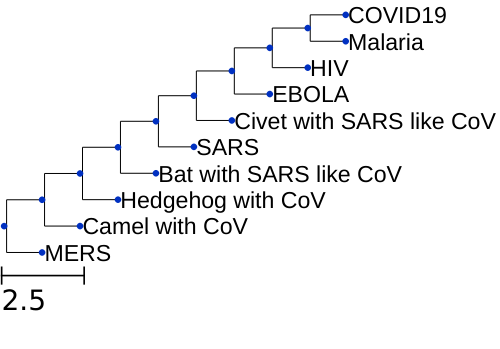

In [29]:
tree = Tree(phylogenetic_tree + ";")
# render tree image
tree.render("%%inline", w=500)

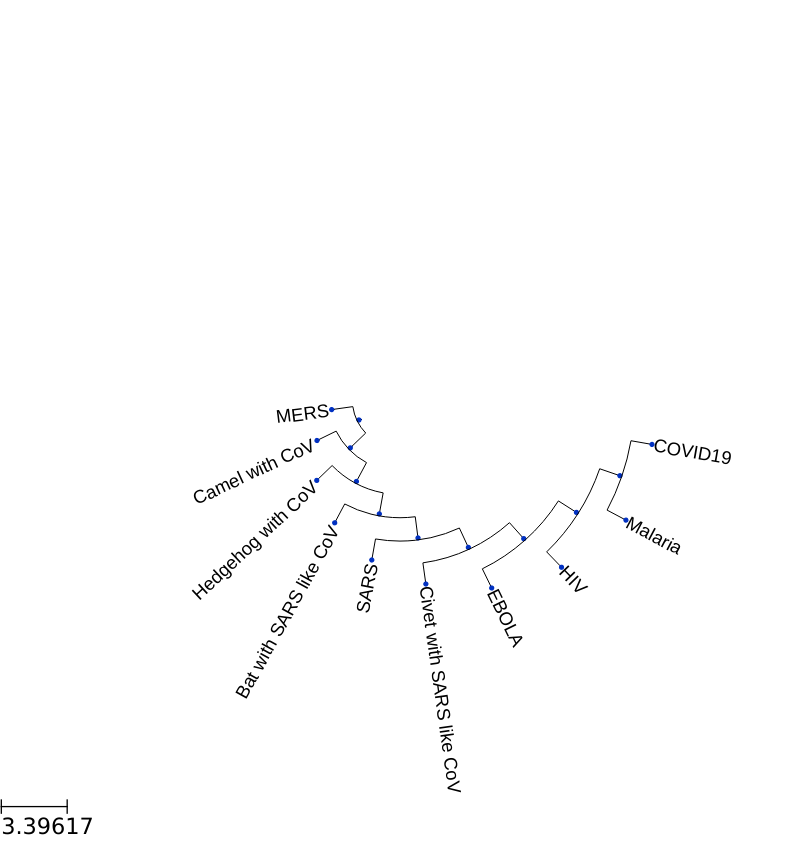

In [30]:
# show the phylogenetic family as circular tree
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = 'c'
ts.arc_start = 10 # 0 degrees = 3 o'clock
ts.arc_span = 180

tree.render("%%inline", w=800, tree_style=ts)

<a id="Clustering-patients-genomes"></a>
# Clustering all COVID-19 patients' genomes
using the same UPGMA Algorithm

In [31]:
with open("/kaggle/input/covid19-genomes/LC528232.txt", "r") as file:
    LC528232 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/LC528233.txt", "r") as file:
    LC528233 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/LC529905.txt", "r") as file:
    LC529905 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/LC534418.txt", "r") as file:
    LC534418 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/LC534419.txt", "r") as file:
    LC534419 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/LR757995.txt", "r") as file:
    LR757995 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/LR757996.txt", "r") as file:
    LR757996 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/LR757998.txt", "r") as file:
    LR757998 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN908947.txt", "r") as file:
    MN908947 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN938384.txt", "r") as file:
    MN938384 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN975262.txt", "r") as file:
    MN975262 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN985325.txt", "r") as file:
    MN985325 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN988668.txt", "r") as file:
    MN988668 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN988669.txt", "r") as file:
    MN988669 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN988713.txt", "r") as file:
    MN988713 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN994467.txt", "r") as file:
    MN994467 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN994468.txt", "r") as file:
    MN994468 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN996527.txt", "r") as file:
    MN996527 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN996529.txt", "r") as file:
    MN996529 = file.read().replace("\n", "")
with open("/kaggle/input/covid19-genomes/MN996530.txt", "r") as file:
    MN996530 = file.read().replace("\n", "")
    
patients = ["COVID19","LC528232","LC528233","LC529905","LC534418","LC534419","LR757995","LR757996","LR757998","MN908947","MN938384","MN975262","MN985325","MN988668","MN988669","MN988713","MN994467","MN994468","MN996527","MN996529","MN996530"]
patients_viruses = [cov_genome,LC528232,LC528233,LC529905,LC534418,LC534419,LR757995,LR757996,LR757998,MN908947,MN938384,MN975262,MN985325,MN988668,MN988669,MN988713,MN994467,MN994468,MN996527,MN996529,MN996530]

diff_mat = []
for i in range(len(patients_viruses)):
    if i == 0:
        diff_mat.append([])
    else:
        row = []
        for j in range(0,i):
            row.append(aligner.score(patients_viruses[i],patients_viruses[j]))
        diff_mat.append(row)

phylogenetic_tree = upgma(diff_mat, patients)
print("Phylogenetic Tree of the genomes of all COVID infected persons:\n", phylogenetic_tree)

Phylogenetic Tree of the genomes of all COVID infected persons:
 (((((COVID19,LC529905),MN908947),((((((((LC534418,(LC534419,(LR757995,(LR757996,(LR757998,(((MN938384,MN996527),MN996529),MN996530)))))),MN988668),MN988669),MN985325),MN994467),MN994468),MN988713),MN975262)),LC528232),LC528233)


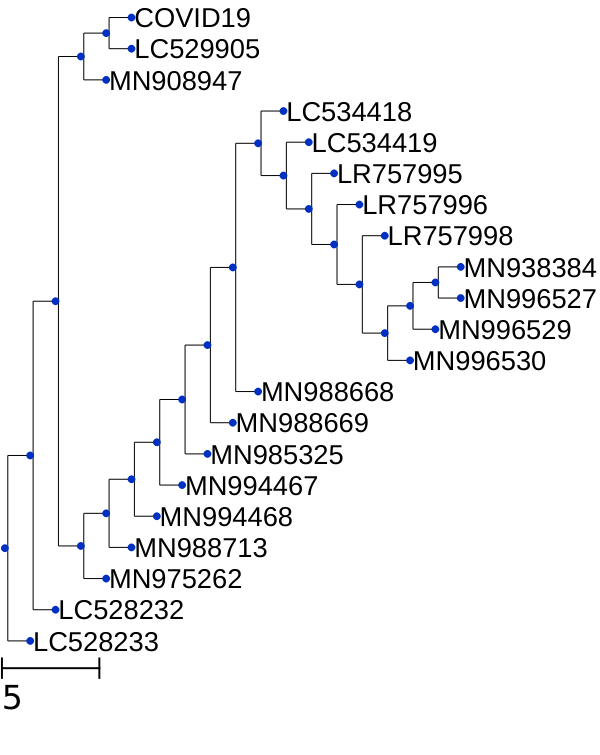

In [32]:
tree = Tree(phylogenetic_tree + ";")
tree.render("%%inline", w=600)

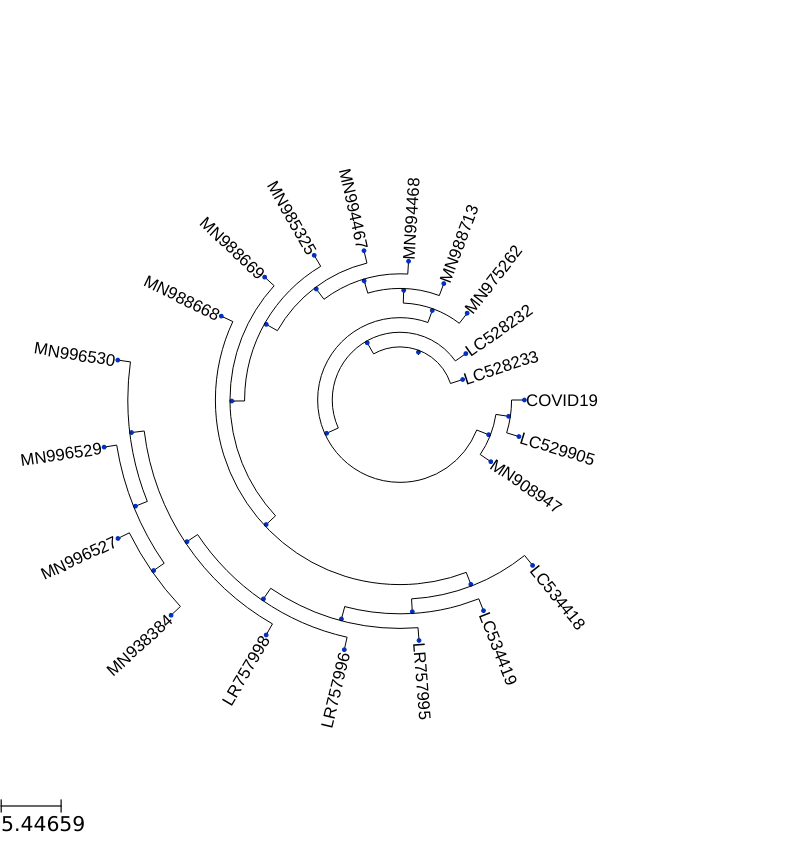

In [33]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = 'c'
tree.render("%%inline", w=800, tree_style=ts)

<a id="Conclusions"></a>
# Conclusions

- Based on the oligonucleotide compositions, all the genomes from coronaviridae family show similar composition (trinucleotide and tetranucleotide composition)
- Based on GC content, the composition of Hedgehog infected Corona virus is closely similar to COVID-19 genome's GC content.
- Judging by the number of protein strands, the count in COVID19's genome is very close to those found in Bat infected with SARS like corona virus.
- If you filter down some of the categories in the plotly-plot of distribution of amino acids, you'll see the percentage of amino acids in COVID-19's genome closely match to those of MERS, Civet infected with SARS like CoV, Camel with alpha CoV and Malaria except for some and low high contents among L (Leucine), P (Proline) and T (Threonine) amino acids.
- Checking by the generated Phylogenetic tree, the genomes of COVID-19 and malaria virus show the maximum similarity. Perhaps this also explains why there's a lot of buzz on the news and internet about trying [Hydroxycholorquine](https://en.wikipedia.org/wiki/Hydroxychloroquine) and [anti-retroviral drugs](https://www.deccanherald.com/city/top-bengaluru-stories/coronavirus-hiv-anti-retroviral-drugs-to-be-used-for-covid-19-treatment-814534.html) which happen to be the medicines for malaria and HIV viruses, respectively.
- Of all the genomes of COVID-19 infected patients avaialable on Kaggle, some patients show similar traits when clustered based on their genome sequence similarity.I really don't know how helpful this would be but if something works or had worked for a patient, then same should also work for patients in the same cluster.

I really hope this turns out to be of any help to any microbiologist or vaccinologist out there.
If you liked this kernel or found it useful, please consider upvoting this notebook.<br>Thank you. Stay Home & Stay Safe!